In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt


In [4]:
#Create user–item rating dataset
data = {
    'user_id': [1,1,1,2,2,3,3,3,4,4,5,5],
    'item_id': [101,102,103,101,104,102,103,105,101,105,103,104],
    'rating':  [5,4,3,4,5,2,5,4,5,3,4,5]
}

df = pd.DataFrame(data)
df


,user_id,item_id,rating
0,1,101,5
1,1,102,4
2,1,103,3
3,2,101,4
4,2,104,5
5,3,102,2
6,3,103,5
7,3,105,4
8,4,101,5
9,4,105,3


In [5]:
#Create user–item matrix
user_item_matrix = df.pivot_table(
    index='user_id',
    columns='item_id',
    values='rating'
).fillna(0)

user_item_matrix


item_id,101,102,103,104,105
user_id,,,,,
1,5.0,4.0,3.0,0.0,0.0
2,4.0,0.0,0.0,5.0,0.0
3,0.0,2.0,5.0,0.0,4.0
4,5.0,0.0,0.0,0.0,3.0
5,0.0,0.0,4.0,5.0,0.0


In [6]:
#Train–test split
train_data, test_data = train_test_split(
    df, test_size=0.2, random_state=42
)


In [7]:
#Matrix factorization
svd = TruncatedSVD(n_components=2, random_state=42)
latent_matrix = svd.fit_transform(user_item_matrix)


In [8]:
#Reconstruct rating matrix
reconstructed_matrix = np.dot(
    latent_matrix,
    svd.components_
)

reconstructed_df = pd.DataFrame(
    reconstructed_matrix,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

reconstructed_df


item_id,101,102,103,104,105
user_id,,,,,
1,3.394307,2.149391,3.651110,1.672997,2.061965
2,4.299514,-0.016134,0.169727,4.663244,-0.503531
3,1.233269,2.755293,4.538227,-1.226167,2.995059
4,2.654524,1.072269,1.865246,1.873777,0.920189
5,2.977855,0.864065,1.541298,2.416741,0.646863


In [9]:
#Generate recommendations
def recommend_items(user_id, n=3):
    user_ratings = reconstructed_df.loc[user_id]
    return user_ratings.sort_values(ascending=False).head(n)

# Example
recommend_items(user_id=1)


item_id
103    3.651110
101    3.394307
102    2.149391
Name: 1, dtype: float64

In [10]:
#Evaluate model (RMSE)
actual = []
predicted = []

for _, row in test_data.iterrows():
    actual.append(row['rating'])
    predicted.append(
        reconstructed_df.loc[row['user_id'], row['item_id']]
    )

rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)


RMSE: 2.0775851804631995


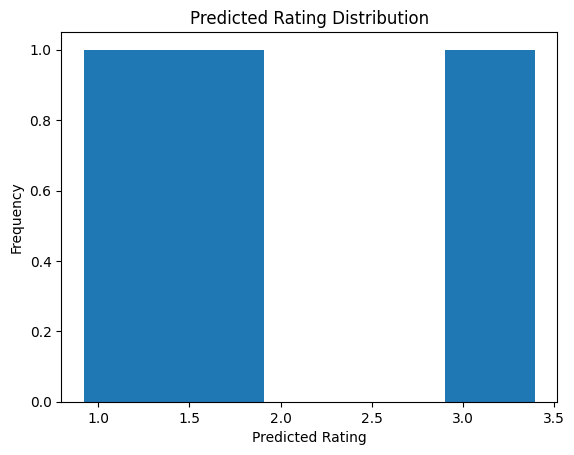

In [11]:
#Visualization
plt.hist(predicted, bins=5)
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.title("Predicted Rating Distribution")
plt.show()


## Analysis

- A recommendation system was developed using collaborative filtering.
- User–item interactions were represented as a rating matrix.
- Matrix factorization was performed using SVD.
- Predicted ratings were generated for user–item pairs.
- Personalized recommendations were produced.
- Model performance was evaluated using RMSE.
- This demonstrates how collaborative filtering enables recommendation systems.
